<a href="https://colab.research.google.com/github/duonghung86/Injury-severity-classification/blob/main/VCA_2_1_Simple_clfs_weights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Basic packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import time
import seaborn as sns

# Import dataset

In [3]:
df = pd.read_csv('Prepared Texas 2019.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949856 entries, 0 to 949855
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Prsn_Injry_Sev     949856 non-null  int64 
 1   Prsn_Age           949856 non-null  int64 
 2   Prsn_Gndr          949856 non-null  object
 3   Wthr_Cond          949856 non-null  object
 4   Light_Cond         949856 non-null  object
 5   Surf_Cond          949856 non-null  object
 6   Veh_Body_Styl      949856 non-null  object
 7   Prsn_Rest          949856 non-null  object
 8   Prsn_Drg_Rslt      949856 non-null  object
 9   Harm_Evnt          949856 non-null  object
 10  Rural              949856 non-null  int64 
 11  Crash_Speed_Limit  949856 non-null  int64 
 12  Road_Algn          949856 non-null  object
 13  Veh_Mod_Year       949856 non-null  int64 
 14  Weekend            949856 non-null  int64 
 15  Crash_season       949856 non-null  int64 
 16  Part_of_day        9

,Prsn_Injry_Sev,Prsn_Age,Prsn_Gndr,Wthr_Cond,Light_Cond,Surf_Cond,Veh_Body_Styl,Prsn_Rest,Prsn_Drg_Rslt,Harm_Evnt,Rural,Crash_Speed_Limit,Road_Algn,Veh_Mod_Year,Weekend,Crash_season,Part_of_day,Collsn_type,Collsn_name
0,0,26,MALE,CLEAR,DAYLIGHT,DRY,"PASSENGER CAR, 2-DOOR",SHOULDER & LAP BELT,Not Applicable,MOTOR VEHICLE IN TRANSPORT,0,-1,"STRAIGHT, LEVEL",33,1,3,3,SAME DIRECTION,ONE STRAIGHT-ONE LEFT TURN
1,0,52,MALE,CLEAR,DAYLIGHT,DRY,"PASSENGER CAR, 2-DOOR",SHOULDER & LAP BELT,Not Applicable,MOTOR VEHICLE IN TRANSPORT,0,-1,"STRAIGHT, LEVEL",19,1,3,3,SAME DIRECTION,ONE STRAIGHT-ONE LEFT TURN
2,0,27,FEMALE,CLEAR,DAYLIGHT,DRY,PICKUP,SHOULDER & LAP BELT,Not Applicable,MOTOR VEHICLE IN TRANSPORT,1,-1,"CURVE, LEVEL",16,1,3,4,SAME DIRECTION,BOTH LEFT TURN
3,0,44,MALE,CLEAR,DAYLIGHT,DRY,PICKUP,SHOULDER & LAP BELT,Not Applicable,MOTOR VEHICLE IN TRANSPORT,1,-1,"CURVE, LEVEL",4,1,3,4,SAME DIRECTION,BOTH LEFT TURN
4,0,50,FEMALE,CLEAR,DAYLIGHT,DRY,SPORT UTILITY VEHICLE,SHOULDER & LAP BELT,Not Applicable,MOTOR VEHICLE IN TRANSPORT,0,-1,"STRAIGHT, LEVEL",16,1,3,4,ANGLE,BOTH GOING STRAIGHT


In [4]:
y=df['Prsn_Injry_Sev']
y.value_counts()

0    792558
1    102409
2     45242
3      7951
4      1696
Name: Prsn_Injry_Sev, dtype: int64

In [5]:
y.value_counts()/len(y)

0    0.834398
1    0.107815
2    0.047630
3    0.008371
4    0.001786
Name: Prsn_Injry_Sev, dtype: float64

In [6]:
X = df.drop(columns=['Prsn_Injry_Sev'])
X.shape

(949856, 18)

In [7]:
feats = X.columns

In [8]:
cate_vars = df.dtypes[df.dtypes=='O'].index.values
cate_vars

array(['Prsn_Gndr', 'Wthr_Cond', 'Light_Cond', 'Surf_Cond',
       'Veh_Body_Styl', 'Prsn_Rest', 'Prsn_Drg_Rslt', 'Harm_Evnt',
       'Road_Algn', 'Collsn_type', 'Collsn_name'], dtype=object)

In [9]:
from sklearn.preprocessing import OneHotEncoder

In [10]:
X.head()

,Prsn_Age,Prsn_Gndr,Wthr_Cond,Light_Cond,Surf_Cond,Veh_Body_Styl,Prsn_Rest,Prsn_Drg_Rslt,Harm_Evnt,Rural,Crash_Speed_Limit,Road_Algn,Veh_Mod_Year,Weekend,Crash_season,Part_of_day,Collsn_type,Collsn_name
0,26,MALE,CLEAR,DAYLIGHT,DRY,"PASSENGER CAR, 2-DOOR",SHOULDER & LAP BELT,Not Applicable,MOTOR VEHICLE IN TRANSPORT,0,-1,"STRAIGHT, LEVEL",33,1,3,3,SAME DIRECTION,ONE STRAIGHT-ONE LEFT TURN
1,52,MALE,CLEAR,DAYLIGHT,DRY,"PASSENGER CAR, 2-DOOR",SHOULDER & LAP BELT,Not Applicable,MOTOR VEHICLE IN TRANSPORT,0,-1,"STRAIGHT, LEVEL",19,1,3,3,SAME DIRECTION,ONE STRAIGHT-ONE LEFT TURN
2,27,FEMALE,CLEAR,DAYLIGHT,DRY,PICKUP,SHOULDER & LAP BELT,Not Applicable,MOTOR VEHICLE IN TRANSPORT,1,-1,"CURVE, LEVEL",16,1,3,4,SAME DIRECTION,BOTH LEFT TURN
3,44,MALE,CLEAR,DAYLIGHT,DRY,PICKUP,SHOULDER & LAP BELT,Not Applicable,MOTOR VEHICLE IN TRANSPORT,1,-1,"CURVE, LEVEL",4,1,3,4,SAME DIRECTION,BOTH LEFT TURN
4,50,FEMALE,CLEAR,DAYLIGHT,DRY,SPORT UTILITY VEHICLE,SHOULDER & LAP BELT,Not Applicable,MOTOR VEHICLE IN TRANSPORT,0,-1,"STRAIGHT, LEVEL",16,1,3,4,ANGLE,BOTH GOING STRAIGHT


In [11]:
X = pd.get_dummies(X,columns=cate_vars,drop_first=1).copy()
print(X.shape)
X.head()

(949856, 105)


,Prsn_Age,Rural,Crash_Speed_Limit,Veh_Mod_Year,Weekend,Crash_season,Part_of_day,Prsn_Gndr_MALE,Prsn_Gndr_UNKNOWN,Wthr_Cond_CLEAR,...,Collsn_name_ONE RIGHT TURN-ONE LEFT TURN,Collsn_name_ONE RIGHT TURN-ONE STOPPED,Collsn_name_ONE STRAIGHT-ONE BACKING,Collsn_name_ONE STRAIGHT-ONE ENTERING OR LEAVING PARKI,Collsn_name_ONE STRAIGHT-ONE LEFT TURN,Collsn_name_ONE STRAIGHT-ONE RIGHT TURN,Collsn_name_ONE STRAIGHT-ONE STOPPED,Collsn_name_OTHER,Collsn_name_TURNING LEFT,Collsn_name_TURNING RIGHT
0,26,0,-1,33,1,3,3,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,52,0,-1,19,1,3,3,1,0,1,...,0,0,0,0,1,0,0,0,0,0
2,27,1,-1,16,1,3,4,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,44,1,-1,4,1,3,4,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,50,0,-1,16,1,3,4,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# balanced ratio
Y = pd.get_dummies(y)

In [14]:
len(y)

949856

In [17]:
Y.head()

,0,1,2,3,4
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [ ]:
np.max(np.bincount(y))/np.min(np.bincount(Y.values[:,i]))

In [18]:
np.bincount(Y.values[:,1])

array([847447, 102409], dtype=int64)

In [20]:
[np.max(np.bincount(Y.values[:,i]))/np.min(np.bincount(Y.values[:,i])) for i in range(5)]
    

[5.038576459967705,
 8.275122303703776,
 19.99500464170461,
 118.46371525594265,
 559.0566037735849]

# Check the Variance Inlfation Factor

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
vars =X.columns[[x.find('Harm')!=-1 for x in X.columns]].values
vars

array(['Harm_Evnt_FIXED OBJECT', 'Harm_Evnt_MOTOR VEHICLE IN TRANSPORT',
       'Harm_Evnt_OTHER NON COLLISION', 'Harm_Evnt_OTHER OBJECT',
       'Harm_Evnt_OVERTURNED', 'Harm_Evnt_PARKED CAR',
       'Harm_Evnt_PEDALCYCLIST', 'Harm_Evnt_PEDESTRIAN',
       'Harm_Evnt_RR TRAIN'], dtype=object)

In [36]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X[vars].values, i) for i in range(X[vars].shape[1])]
vif["features"] = X[vars].columns

In [37]:
vif.round(1)

,VIF Factor,features
0,0.0,Harm_Evnt_FIXED OBJECT
1,0.0,Harm_Evnt_MOTOR VEHICLE IN TRANSPORT
2,0.0,Harm_Evnt_OTHER NON COLLISION
3,0.1,Harm_Evnt_OTHER OBJECT
4,0.0,Harm_Evnt_OVERTURNED
5,0.0,Harm_Evnt_PARKED CAR
6,0.1,Harm_Evnt_PEDALCYCLIST
7,0.0,Harm_Evnt_PEDESTRIAN
8,1.0,Harm_Evnt_RR TRAIN


# Split the dataset

In [38]:
from sklearn.model_selection import train_test_split

`For quick test let use only 50% of the data set`

In [127]:
X_new, _, y_new, _ = train_test_split(X.values,y,test_size=0.8,stratify=y, random_state=34)

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X_new,y_new,test_size=0.2,stratify=y_new, random_state=48)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,stratify=y_train, random_state=48)

#X_train=np.array(X_train)
#X_test=np.array(X_test)
#X_val=np.array(X_val)

print('Training features shape:', X_train.shape)
print('Validation features shape:', X_val.shape)
print('Test features shape:', X_test.shape)

Training features shape: (121580, 105)
Validation features shape: (30396, 105)
Test features shape: (37995, 105)


In [129]:
# standardization
from sklearn.preprocessing import StandardScaler

In [130]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Check PCA

In [131]:
from sklearn.decomposition import PCA

In [132]:
pca = PCA(n_components=2)
pca.fit(X_train)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

[0.04470007 0.0250638 ]
[751.79915805 562.95183484]


In [133]:
X_pca = pca.transform(X_train)

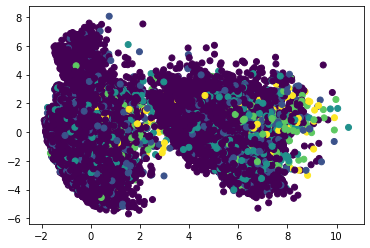

In [134]:
plt.scatter(X_pca[:,0],X_pca[:,1],c = y_train)

In [135]:
pca = PCA(0.8)
X_train_pca = pca.fit_transform(X_train)
print(pca.explained_variance_ratio_)

[0.04470007 0.02506624 0.0233805  0.02217317 0.01963672 0.01940705
 0.01745024 0.01728264 0.01645799 0.01579719 0.01496927 0.0138584
 0.01349937 0.01344123 0.01312755 0.01281707 0.01248232 0.01200948
 0.01183558 0.01175247 0.01127424 0.01111899 0.01090612 0.01072356
 0.01071212 0.01057567 0.01047408 0.01032301 0.0102581  0.01024714
 0.01014607 0.01006945 0.01003375 0.0100164  0.01000307 0.0099492
 0.00990207 0.00988816 0.00985859 0.00983392 0.00979454 0.00977891
 0.00976464 0.00971942 0.00971509 0.00969156 0.00968297 0.00966592
 0.00964826 0.00963058 0.00962653 0.00961224 0.00961033 0.00960633
 0.0096043  0.00957514 0.00956379 0.00952624 0.00951178 0.0094801
 0.00943441 0.00943131 0.00938587 0.00934867 0.00932773 0.00927446]


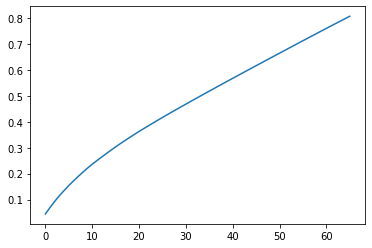

In [136]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [137]:
X_pca.shape

(121580, 2)

In [138]:
X_test_pca = pca.transform(X_test)
X_test_pca.shape

(37995, 66)

# Mini function

In [139]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import auc

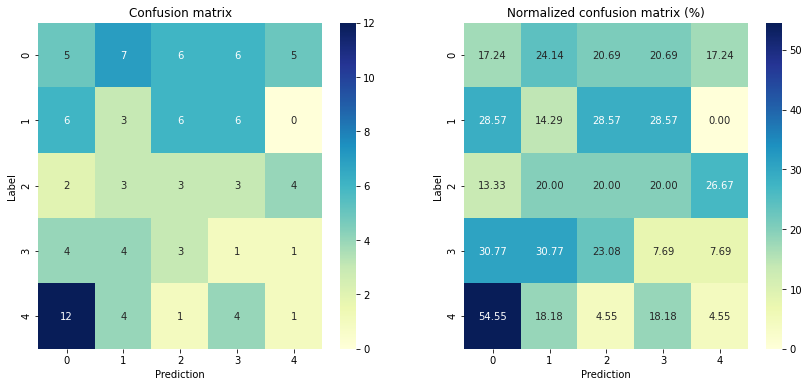

,Class 0,Class 1,Class 2,Class 3,Class 4,Overall Accuracy,G-mean
0,0.172414,0.142857,0.2,0.076923,0.045455,0.13,0.111488


In [140]:
def get_accs(label,prediction, show=True):
    cm = confusion_matrix(label,prediction)
    length = cm.shape[0]
    num_cases = len(label)
    # global accuracy
    glb_acc = np.trace(cm)/len(label)
    ind_accs = cm/np.sum(cm,axis=1)[:, np.newaxis]
    accs = [ind_accs[i,i] for i in range(length)]
    index = ['Class {}'.format(i) for i in range(length)]
    #Global accuracy
    accs.append(glb_acc)
    index.append('Overall Accuracy')
    # G-mean
    accs.append(geometric_mean_score(label, prediction,correction=0.001))
    index.append('G-mean')
    if show:
        plt.figure(figsize=(14, 6))
        plt.subplot(1,2,1)
        sns.heatmap(cm, xticklabels=np.arange(length), yticklabels=np.arange(length), 
                    annot=True, fmt='g',cmap="YlGnBu")
        plt.xlabel('Prediction')
        plt.ylabel('Label')
        plt.title('Confusion matrix')
        plt.subplot(1,2,2)
        sns.heatmap(ind_accs*100, xticklabels=np.arange(length), yticklabels=np.arange(length), 
                    annot=True, fmt='.2f',cmap="YlGnBu")
        plt.xlabel('Prediction')
        plt.ylabel('Label')
        plt.title('Normalized confusion matrix (%)')
        plt.show()
    out = np.array(accs).reshape(1,len(accs))
    return pd.DataFrame(out,columns = index)
get_accs(np.random.randint(5, size=100),np.random.randint(5, size=100))

# Applying traditional machine learning algorithms


In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import ComplementNB

LR


C:\Anaconda\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


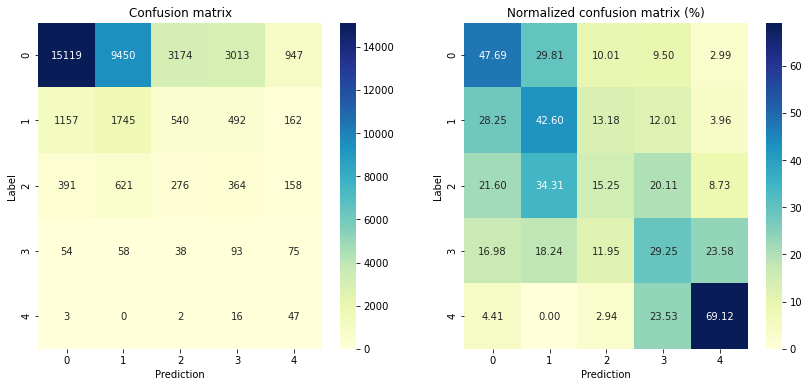

DT


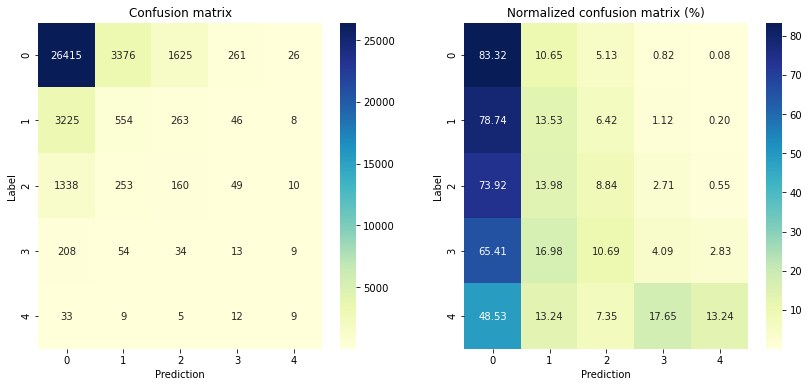

RF


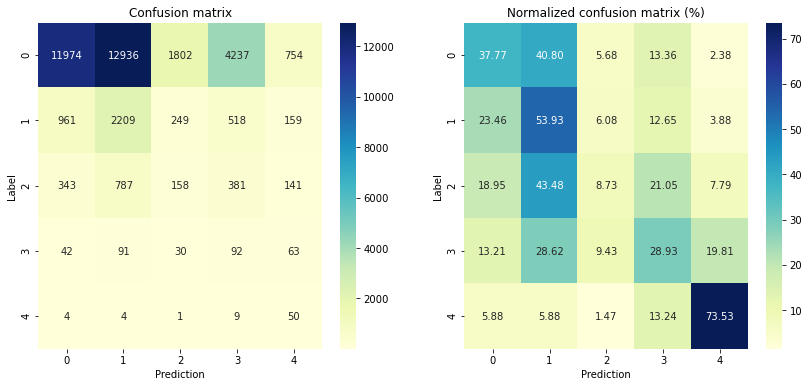

,Class 0,Class 1,Class 2,Class 3,Class 4,Overall Accuracy,G-mean,Training Time
LR,0.476895,0.426025,0.152486,0.292453,0.691176,0.454797,0.362532,12.049
DT,0.833202,0.135254,0.088398,0.040881,0.132353,0.714594,0.140061,38.551
RF,0.377693,0.539307,0.087293,0.289308,0.735294,0.381182,0.327759,62.603


In [149]:
cls_wgt='balanced'
LR = LogisticRegression(solver = 'lbfgs',class_weight=cls_wgt)
DT = DecisionTreeClassifier(class_weight=cls_wgt)
RF = RandomForestClassifier(max_depth=4,class_weight=cls_wgt)
GNB = GaussianNB()
#CNB = ComplementNB()
SGD = SGDClassifier(loss="hinge", penalty="l2", max_iter=5,class_weight=cls_wgt)

clfs = [LR,DT,RF]
clf_names = ['LR','DT','RF']
rsts = pd.DataFrame()
for model, name in zip(clfs,clf_names):
    start = time.time()
    print(name)
    model.fit(X_train_pca, y_train.values)
    # use the model to make predictions with the test data
    y_pred = model.predict(X_test_pca)
    end= time.time()
    # get the evaluation metrics
    result = get_accs(y_test.values,y_pred,True)
    result['Training Time'] = np.round(end-start,3)
    result.index = [name]
    rsts = rsts.append(result)
rsts

# 5 binary OneVsAll models

In [150]:
# Create labels matrix
Y_train = pd.get_dummies(y_train)
Y_train.head()

,0,1,2,3,4
758019,0,1,0,0,0
567750,1,0,0,0,0
873022,1,0,0,0,0
413107,1,0,0,0,0
929259,0,0,1,0,0


In [152]:
Y_test = pd.get_dummies(y_test)
Y_test.head()

,0,1,2,3,4
634996,1,0,0,0,0
283539,0,0,1,0,0
831831,0,0,1,0,0
239029,1,0,0,0,0
513022,1,0,0,0,0


In [154]:
'Model {0} scored {1:.2f} for the train set and {2:.2f} for the test set.'.format(1,0.23434,2.34324)

'Model 1 scored 0.23 for the train set and 2.34 for the test set.'

In [160]:
start = time.time()
Y_pred = []
for i in range(5):
    LR = LogisticRegression(solver = 'saga',class_weight='balanced') 
    LR.fit(X_train_pca,Y_train.values[:,i])
    score_train = LR.score(X_train_pca,Y_train.values[:,i])
    score_test = LR.score(X_test_pca,Y_test.values[:,i])
    Y_pred.append(LR.predict_proba(X_test_pca))
    print('Model {0} scored {1:.2f} for the train set and {2:.2f} for the test set.'.format(i,score_train,score_test))  
end = time.time()
end-start

C:\Anaconda\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Model 0 scored 0.60 for the train set and 0.60 for the test set.


C:\Anaconda\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Model 1 scored 0.54 for the train set and 0.54 for the test set.


C:\Anaconda\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Model 2 scored 0.64 for the train set and 0.63 for the test set.


C:\Anaconda\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Model 3 scored 0.76 for the train set and 0.76 for the test set.
Model 4 scored 0.91 for the train set and 0.91 for the test set.


C:\Anaconda\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


108.34000062942505

In [165]:
Y_pred =np.array(Y_pred)

In [169]:
Y_pred.shape

(5, 37995, 2)

In [168]:
Y_pred[:,:,0].shape

(5, 37995)

In [175]:
y_pred = Y_pred[:,:,1].argmax(axis=0)
y_pred

array([3, 2, 3, ..., 4, 1, 0], dtype=int64)

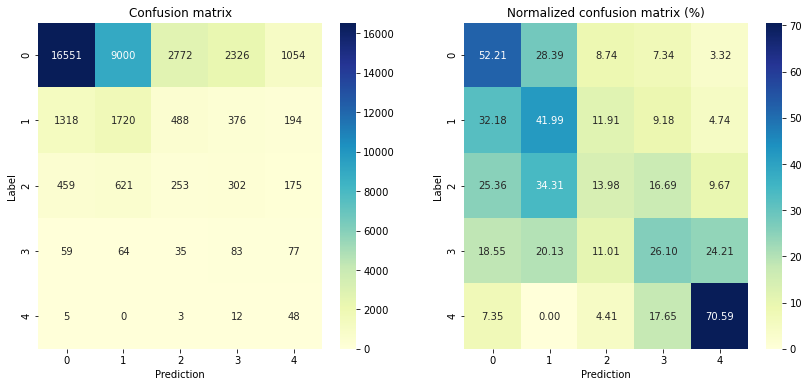

,Class 0,Class 1,Class 2,Class 3,Class 4,Overall Accuracy,G-mean
0,0.522064,0.419922,0.139779,0.261006,0.705882,0.490986,0.355094


In [176]:
get_accs(y_test.values,y_pred,True)

# A simple MLP


In [59]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [60]:
MLP = tf.keras.Sequential([
    keras.layers.Dense(5, activation='relu',input_dim=X_train.shape[1]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(5),
])
MLP.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train on 607907 samples, validate on 151977 samples
Epoch 1/10
607907/607907 [==============================] - 56s 93us/sample - loss: 0.6182 - accuracy: 0.8278 - val_loss: 0.5579 - val_accuracy: 0.8344
Epoch 2/10
607907/607907 [==============================] - 51s 84us/sample - loss: 0.5666 - accuracy: 0.8344 - val_loss: 0.5582 - val_accuracy: 0.8344
Epoch 3/10
607907/607907 [==============================] - 53s 87us/sample - loss: 0.5662 - accuracy: 0.8344 - val_loss: 0.5579 - val_accuracy: 0.8344
Epoch 4/10
607907/607907 [==============================] - 50s 81us/sample - loss: 0.5658 - accuracy: 0.8344 - val_loss: 0.5577 - val_accuracy: 0.8344
Epoch 5/10
607907/607907 [==============================] - 54s 89us/sample - loss: 0.5656 - accuracy: 0.8344 - val_loss: 0.5567 - val_accuracy: 0.8344
Epoch 6/10
607907/607907 [==============================] - 55s 90us/sample - loss: 0.5649 - accuracy: 0.8344 - val_loss: 0.5532 - val_accuracy: 0.8344
Epoch 7/10
607907/607907 [==========

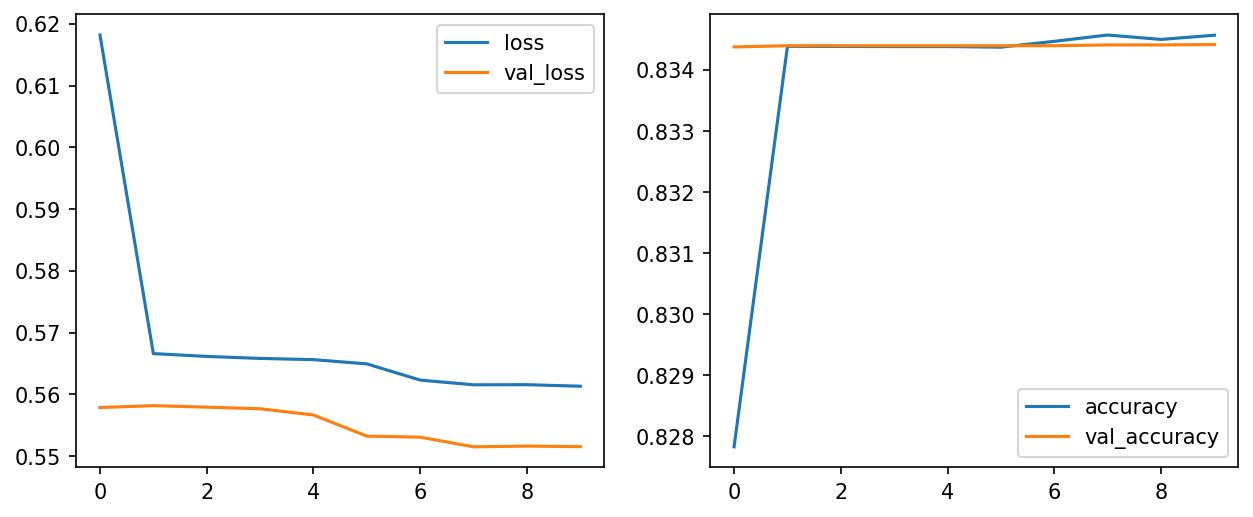

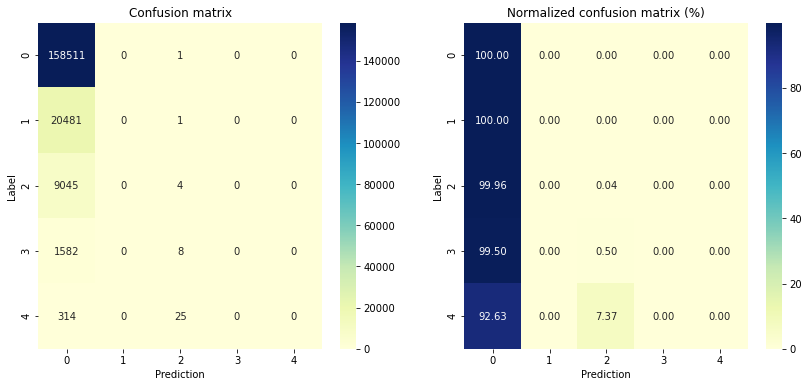

,LR,DT,RF,GNB-no weights,SGD,MLP
Global accuracy,0.494683,0.713016,0.578712,0.057535,0.741193,0.834412
Class 1,0.523109,0.828770,0.648298,0.066594,0.876098,0.999994
Class 2,0.434723,0.151548,0.317547,0.000049,0.056440,0.000000
Class 3,0.147972,0.090507,0.012488,0.001989,0.021328,0.000442
Class 4,0.364780,0.057233,0.200629,0.013836,0.208176,0.000000
Class 5,0.690265,0.203540,0.707965,0.982301,0.749263,0.000000
G-mean,0.385129,0.167646,0.205349,0.009745,0.175078,0.003381
Training time,62.598436,57.618595,50.624689,3.853003,9.340441,538.243962


In [61]:
start = time.time()
Monitor_MLP = MLP.fit(X_train, y_train, callbacks=[es],validation_data = (X_val,y_val), 
                      class_weight = cls_wgt, verbose = 1, epochs = 10)
# use the model to make predictions with the test data
y_pred = MLP.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
end= time.time()

# Show evolution of the training process
hist = pd.DataFrame(Monitor_MLP.history)
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,4),dpi=150)
hist[['loss','val_loss']].plot(ax=axes[0])
hist[['accuracy','val_accuracy']].plot(ax=axes[1])
plt.show()
# get the evaluation metrics
result = get_accs(y_test,y_pred,True)
result.append(end-start)

rsts['MLP'] = result
rsts

# Variables


In [62]:
%whos

Variable                 Type                      Data/Info
------------------------------------------------------------
ComplementNB             ABCMeta                   <class 'sklearn.naive_bayes.ComplementNB'>
DT                       DecisionTreeClassifier    DecisionTreeClassifier(cl<...>alanced', random_state=0)
DecisionTreeClassifier   ABCMeta                   <class 'sklearn.tree._cla<...>.DecisionTreeClassifier'>
GNB                      GaussianNB                GaussianNB()
GaussianNB               ABCMeta                   <class 'sklearn.naive_bayes.GaussianNB'>
LR                       LogisticRegression        LogisticRegression(class_weight='balanced')
LogisticRegression       type                      <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
MLP                      Sequential                <tensorflow.python.keras.<...>ct at 0x0000020A081FCA48>
Monitor_MLP              History                   <tensorflow.python.keras.<...>ct at 0x0000020A186A3DC8